# Importowanie bibliotek
- *subprocess* - uruchamianie programów zewnętrznych w skrypcie, uzyskiwanie z nich danych
- *numpy* - obliczenia macierzowe, działania na macierzach
- *matplotlib.pyplot* - biblioteka do rysowania wykresów w stylu MatLab'a

In [81]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import custom_statistics as stat
import custom_approx as approx

# Uzyskiwanie wyników pomiaru z programu

In [82]:
X = np.linspace(1, 450, 20)
U = np.zeros(X.size)

for i, val in enumerate(X):
	program_output = subprocess.run(["z09v01.exe", str(val)], capture_output=True, text=True)
	U[i] = program_output.stdout


In [83]:
# plt.plot(x, t, 'ro')

# Standaryzacja pomiarów do przedziału <-1; 1>
W kolejności obliczamy wartość średnią i jednostkę zmienności:
$$\bar{x}=\frac{x_{i,min} + x_{i,max}}{2}$$
$$\varDelta x=\frac{x_{i,max} + x_{i.min}}{2}$$
Następnie przeliczamy wartości $x_i$ do nowego ukladu współrzędnych:
$$t_i = \frac{x_i - \bar{x}}{\varDelta x}$$
gdzie $i = 1,2,...,N$

In [84]:
average_x = (X[0] + X[-1]) / (2)
delta_x   = (X[-1]+ X[0] ) / (2)

T = [(x - average_x)/delta_x for x in X]

# Aproksymacja danych z użyciem wielomianów

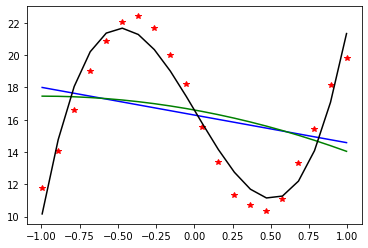

In [85]:
first_deg = approx.polynomial_approximation(T, U, 2)
second_deg = approx.polynomial_approximation(T, U, 3)
third_deg = approx.polynomial_approximation(T, U, 4)

plt.plot(T, U, 'r*', T, first_deg, 'b-', T, second_deg, 'g-', T, third_deg, 'k-')

# Aproksymacja danych z użyciem logarytmu naturalnego

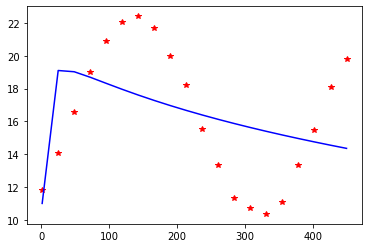

In [86]:
plt.plot(X, U, 'r*', X, approx.natlog_approximation(X, U, 3), 'b-')

# Aproksymacja danych z użyciem funkcji $\frac{1}{x}$

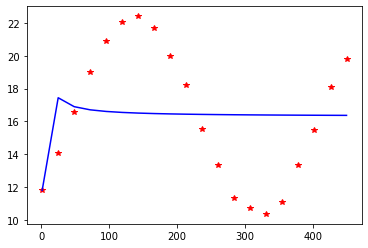

In [87]:
plt.plot(X, U, 'r*', X, approx.rational_approximation(X, U, 3), 'b-')

# Aproksymacja trygonometryczna

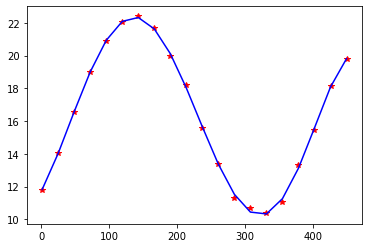

In [89]:
constant = 0.001*np.pi
deg_test = 4
X_test = np.zeros([U.size, deg_test*2])

for i in np.arange(deg_test):
	X_test[:,(2*i)] = np.cos(constant*i*X)
	X_test[:,(2*i)+1] = np.sin(constant*i*X)

X_test = np.delete(X_test, 1, axis=1)

A_test = np.linalg.inv( np.transpose(X_test) @ X_test ) @ np.transpose(X_test) @ U

val_vec = X_test @ A_test
plt.plot(X, U, 'r*', X, val_vec, 'b-')
